# Economic Data - 9 Countries (1980-2020)

### Introduction
> Data for eight nations and one special administrative area are available from 1980 to 2020. (China, France, Germany, Hong Kong, India, Japan, Spain, the United Kingdom, and the United States of America). Inflation, unemployment, GDP, exchange rate (base USD), and per capita income are among the major macroeconomic factors considered.

In [1]:
# import of necessary lib for the project
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data import as df
df = pd.read_csv('EconomicData_9.csv')
df.head()

,stock index,country,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
0,NASDAQ,United States of America,1980.0,168.61,2.23,0.14,21.59,1.0,0.09,12575.0,0.07,NaN,-13.06,0.11
1,NASDAQ,United States of America,1981.0,203.15,2.31,0.10,31.77,1.0,0.12,13976.0,0.08,NaN,-12.52,0.14
2,NASDAQ,United States of America,1982.0,188.98,2.28,0.06,28.52,1.0,0.04,14434.0,0.10,NaN,-19.97,0.13
3,NASDAQ,United States of America,1983.0,285.43,2.46,0.03,26.19,1.0,0.09,15544.0,0.10,NaN,-51.64,0.11
4,NASDAQ,United States of America,1984.0,248.89,2.40,0.04,25.88,1.0,0.11,17121.0,0.08,NaN,-102.73,0.12


In [49]:
# quick look into the data numerically 
df.describe()

,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
count,369.000000,317.000000,369.000000,326.000000,369.000000,367.000000,350.000000,368.000000,348.000000,278.000000,365.000000,369.000000
mean,2000.000000,7898.648297,3.610542,0.041748,39.743171,27.897548,0.037114,20719.964674,0.068908,328.084820,-15.996384,0.059024
std,11.848225,7811.336862,0.482481,0.039579,25.452654,49.620521,0.037850,17435.037783,0.043207,622.395923,154.557170,0.033086
min,1980.000000,168.610000,2.230000,-0.040000,11.350000,0.900000,-0.110000,27.000000,0.020000,0.590000,-770.930000,0.010000
25%,1990.000000,2407.100000,3.320000,0.020000,19.410000,1.330000,0.020000,2090.250000,0.040000,80.380000,-25.370000,0.030000
50%,2000.000000,5160.100000,3.600000,0.030000,28.520000,5.440000,0.030000,19969.500000,0.060000,188.160000,-0.140000,0.050000
75%,2010.000000,10279.500000,3.980000,0.057500,57.880000,15.055000,0.060000,36384.000000,0.090000,271.977500,19.080000,0.080000
max,2020.000000,47751.330000,4.680000,0.240000,98.560000,249.050000,0.150000,65280.000000,0.260000,3868.460000,366.140000,0.140000


In [50]:
# quick look into the data structure and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB


## Database structure
> The dataset contains 368 roles of data with 14 characteristics such as the countries, year, index price, inflation rate, oil price, exchange rate, unemployment rate, etc.

### Main features of interest
> My main focus will on inflation rate and unemployment. I will like to know the effect of each variables of unemployment and inflation rate

### Features in the dataset that might help support the investigation
> Most of the features will be explored because the dataset contains 14 variables which is sizeable enough for the analysis

## Data Wrangling
> Will perform the necessary data cleaning to ensure the data is ready for analysis

### Data Cleanings
><ul><li>Eliminating all null values</li>
><li>Change the data type of year to object data type</li>
><li>Renaming some columns to maintain naming convention</li></ul>

#### Elimination null values from the dataset

In [3]:
df_clean = df.copy()

In [52]:
# checking the value count of all null in the dataset
df_clean.isnull().sum()

stock index             0
country                 0
year                    0
index price            52
log_indexprice          0
inflationrate          43
oil prices              0
exchange_rate           2
gdppercent             19
percapitaincome         1
unemploymentrate       21
manufacturingoutput    91
tradebalance            4
USTreasury              0
dtype: int64

In [4]:
# eliminating null value from the dataset. The manufacturingoutout was used because it has the largest null values from the dataset
Nval = ['manufacturingoutput', 'unemploymentrate', 'percapitaincome','gdppercent','exchange_rate','inflationrate','index price']

for n in Nval:
    df_clean = df_clean[~df_clean[n].isnull()]

In [54]:
# checking for any other null valu
df_clean.isnull().sum()

stock index            0
country                0
year                   0
index price            0
log_indexprice         0
inflationrate          0
oil prices             0
exchange_rate          0
gdppercent             0
percapitaincome        0
unemploymentrate       0
manufacturingoutput    0
tradebalance           2
USTreasury             0
dtype: int64

In [5]:
# eliminating final null value in the dataset
df_clean = df_clean[~df_clean['tradebalance'].isnull()]

In [56]:
# data info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 10 to 367
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          219 non-null    object 
 1   country              219 non-null    object 
 2   year                 219 non-null    float64
 3   index price          219 non-null    float64
 4   log_indexprice       219 non-null    float64
 5   inflationrate        219 non-null    float64
 6   oil prices           219 non-null    float64
 7   exchange_rate        219 non-null    float64
 8   gdppercent           219 non-null    float64
 9   percapitaincome      219 non-null    float64
 10  unemploymentrate     219 non-null    float64
 11  manufacturingoutput  219 non-null    float64
 12  tradebalance         219 non-null    float64
 13  USTreasury           219 non-null    float64
dtypes: float64(12), object(2)
memory usage: 25.7+ KB


#### Change the year column to data type from float to string

In [6]:
# convert object to data
df_clean['year'] = df_clean['year'].astype(int).astype(str)

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 10 to 367
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          219 non-null    object 
 1   country              219 non-null    object 
 2   year                 219 non-null    object 
 3   index price          219 non-null    float64
 4   log_indexprice       219 non-null    float64
 5   inflationrate        219 non-null    float64
 6   oil prices           219 non-null    float64
 7   exchange_rate        219 non-null    float64
 8   gdppercent           219 non-null    float64
 9   percapitaincome      219 non-null    float64
 10  unemploymentrate     219 non-null    float64
 11  manufacturingoutput  219 non-null    float64
 12  tradebalance         219 non-null    float64
 13  USTreasury           219 non-null    float64
dtypes: float64(11), object(3)
memory usage: 25.7+ KB


In [59]:
df_clean.head()

,stock index,country,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
10,NASDAQ,United States of America,1990,409.18,2.61,0.05,27.28,1.0,0.02,23889.0,0.06,182.19,-77.85,0.09
12,NASDAQ,United States of America,1992,599.26,2.78,0.03,19.41,1.0,0.04,25419.0,0.07,189.27,-34.74,0.07
13,NASDAQ,United States of America,1993,715.16,2.85,0.03,14.52,1.0,0.03,26387.0,0.07,166.43,-65.17,0.06
14,NASDAQ,United States of America,1994,751.65,2.88,0.03,17.16,1.0,0.04,27695.0,0.06,187.05,-92.49,0.07
15,NASDAQ,United States of America,1995,925.19,2.97,0.03,19.03,1.0,0.03,28691.0,0.06,208.44,-89.76,0.07


#### Column rename to maintain numeclature

In [7]:
# remaing columns
df_clean.rename(columns={'USTreasury':'US_treasury', 'stock index':'stock_index', 
'index price':'index_price', 'inflationrate':'inflation_rate', 'oil prices':'oil_prices', 'tradebalance':'trade_balance', 'gdppercent':'gdp_percent', 
'percapitaincome':'per_capita_income', 'unemploymentrate':'unemployment_rate', 'manufacturingoutput':'manufacturing_output'}, inplace = True)

In [61]:
df_clean.head()

,stock_index,country,year,index_price,log_indexprice,inflation_rate,oil_prices,exchange_rate,gdp_percent,per_capita_income,unemployment_rate,manufacturing_output,trade_balance,US_treasury
10,NASDAQ,United States of America,1990,409.18,2.61,0.05,27.28,1.0,0.02,23889.0,0.06,182.19,-77.85,0.09
12,NASDAQ,United States of America,1992,599.26,2.78,0.03,19.41,1.0,0.04,25419.0,0.07,189.27,-34.74,0.07
13,NASDAQ,United States of America,1993,715.16,2.85,0.03,14.52,1.0,0.03,26387.0,0.07,166.43,-65.17,0.06
14,NASDAQ,United States of America,1994,751.65,2.88,0.03,17.16,1.0,0.04,27695.0,0.06,187.05,-92.49,0.07
15,NASDAQ,United States of America,1995,925.19,2.97,0.03,19.03,1.0,0.03,28691.0,0.06,208.44,-89.76,0.07


Text(0.5, 1.0, 'Unemployment Rate VS Oil Price')

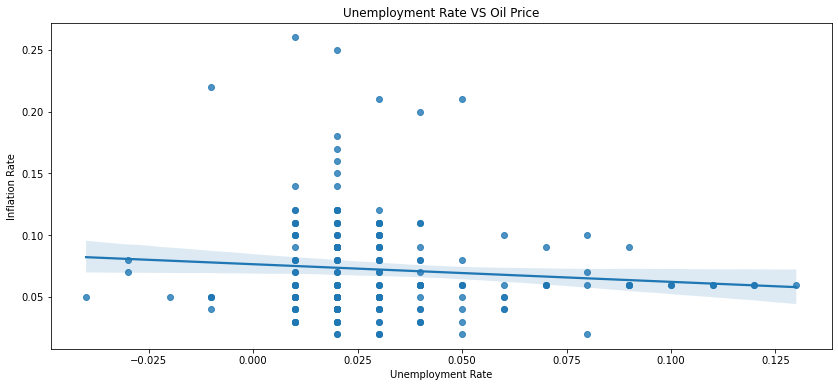

In [8]:
# correlation between unemployment and inflation
plt.figure(figsize=[14, 6])

sn.regplot(data = df_clean, y = 'unemployment_rate', x = 'inflation_rate');
plt.xlabel('Unemployment Rate')
plt.ylabel('Inflation Rate')
plt.title('Unemployment Rate VS Oil Price')

The link between unemployment and inflation has historically been inverse. One causes the other to fall when it rises and vice versa. As observed, the slop is moving towards becoming straight, which might not be a good sign. 

<AxesSubplot:>

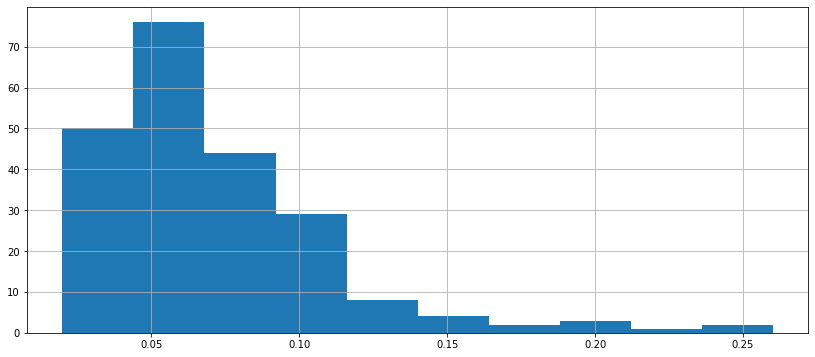

In [11]:
# correlation between unemployment and inflation
plt.figure(figsize=[14, 6])
df_clean['unemployment_rate'].hist()

Unemployment rate of 0.04 to 0.o7 seems to have the highest frequency of unemployment rate. 

<AxesSubplot:>

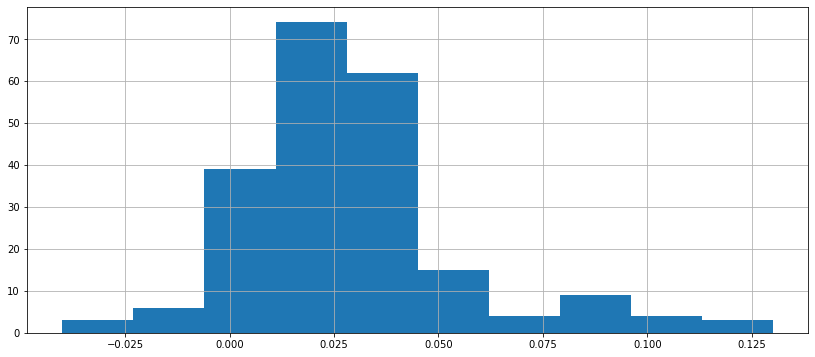

In [12]:
# correlation between unemployment and inflation
plt.figure(figsize=[14, 6])
df_clean['inflation_rate'].hist()

Inflation rate between 0.0125 and 0.03 have the highest frequency among all the inflation rate recorded. 

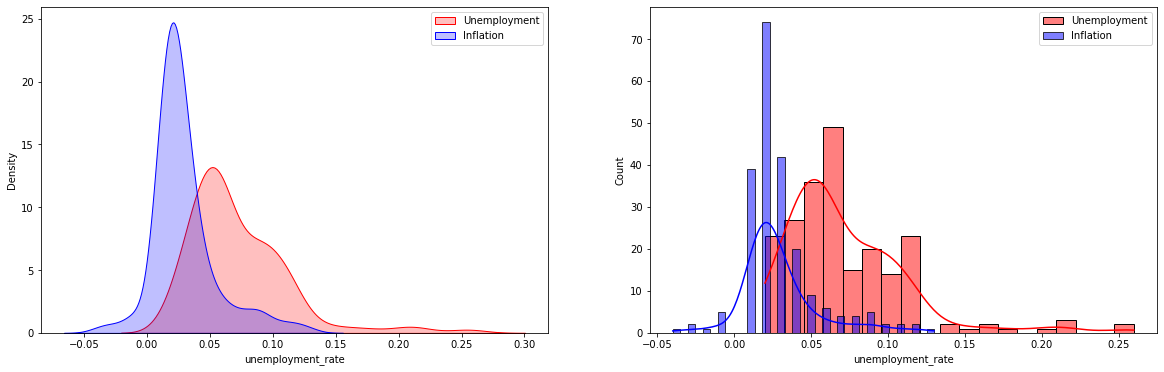

In [63]:
# Density and histogram plot 
plt.figure(figsize=[20, 6])
plt.subplot(1,2,1)

# Density plot
fig = sn.kdeplot(df_clean['unemployment_rate'], shade=True, color="r", label='Unemployment')
fig = sn.kdeplot(df_clean['inflation_rate'], shade=True, color="b", label='Inflation')
plt.legend() 

# Histogram plot
plt.subplot(1,2,2)
sn.histplot(data=df_clean, x='unemployment_rate', color="r", label="Unemployment", kde=True)
sn.histplot(data=df_clean, x='inflation_rate', color="b", label="Inflation", kde=True)

plt.legend() 
plt.show()


Comparing the density chart and histogram chart of the unemployment rate with inflation rate, both variables have similar patterns and are skewed to the right. However, the unemployment rate is much more skewed to the right. 

In [131]:
df_clean.groupby('stock_index').sum()


,index_price,log_indexprice,inflation_rate,oil_prices,exchange_rate,gdp_percent,per_capita_income,unemployment_rate,manufacturing_output,trade_balance,US_treasury
stock_index,,,,,,,,,,,
CAC 40,102893.78,109.73,0.79,1207.96,118.96,0.67,608337.0,3.20,4565.50,-81.49,1.90
DAX 30,157326.94,92.96,0.49,1046.41,33.24,0.42,770429.0,2.16,12755.16,2912.59,1.14
FTSE 100,151504.18,103.97,0.68,1317.36,44.29,0.46,966096.0,1.80,6587.55,-854.43,1.24
HSI,368778.94,81.16,0.28,1127.00,147.87,0.63,659679.0,0.80,84.70,200.55,0.65
IEX 35,191467.42,82.75,0.55,995.31,567.28,0.55,435592.0,3.21,2486.01,-158.62,0.88
NASDAQ,70989.93,86.42,0.65,1195.78,26.00,0.77,1096551.0,1.50,6142.61,-10426.38,1.19
Nifty 50,438424.90,118.95,2.12,1395.58,1426.24,1.79,29171.0,1.76,5562.98,-1092.75,1.29
Nikkei 225,343714.58,87.55,0.38,596.91,3229.21,0.50,554637.0,0.66,1960.01,930.06,1.63
SZCOMP,45238.84,57.88,0.47,1107.75,117.78,1.47,102358.0,0.74,41006.33,3821.16,0.50


In [153]:
ddf=df_clean.groupby('stock_index')['oil_prices'].sum().plot()
ddf

stock_index
CAC 40        1207.96
DAX 30        1046.41
FTSE 100      1317.36
HSI           1127.00
IEX 35         995.31
NASDAQ        1195.78
Nifty 50      1395.58
Nikkei 225     596.91
SZCOMP        1107.75
Name: oil_prices, dtype: float64

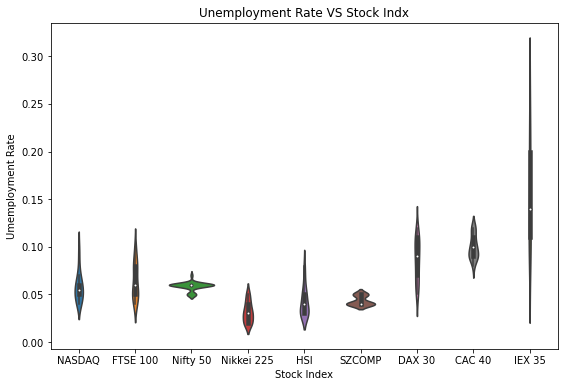

In [28]:
# Grouped violinplot
plt.figure(figsize=[20, 6])

plt.subplot(1,2,1)
sn.violinplot(x=df_clean["stock_index"], y=df_clean["unemployment_rate"])

plt.xlabel('Stock Index');
plt.title('Unemployment Rate VS Stock Indx')
plt.ylabel('Umemployment Rate')
plt.show()

Comparing stock index with unemployment rate did not show any certain patterns. However, Nikkei 225 can be said to have the lowest impact on unemployment rate, while IEX 35 has the highest impact on unemployment rate. 

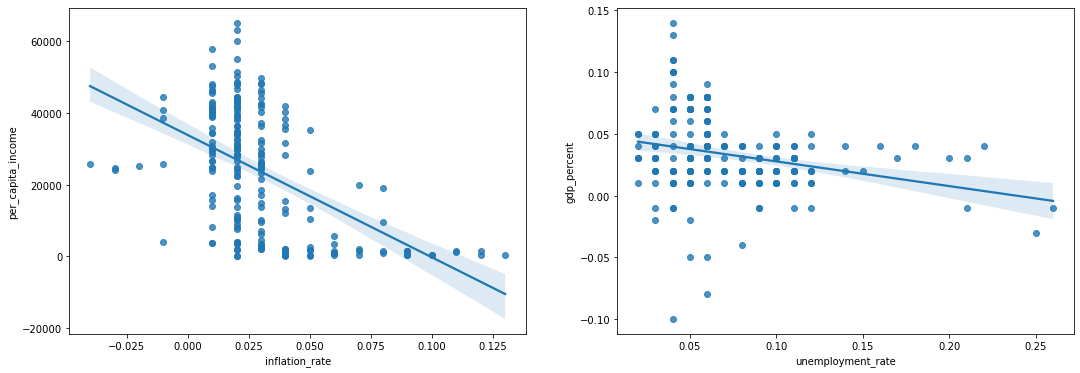

In [23]:
# Relationship between BorrowerAPR and Monthlyloanpayment
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sn.regplot(data = df_clean, x = 'inflation_rate', y = 'per_capita_income')
plt.xlabel('inflation_rate')
plt.ylabel('per_capita_income');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
sn.regplot(data = df_clean, x = 'unemployment_rate', y = 'gdp_percent')
plt.xlabel('unemployment_rate')
plt.ylabel('gdp_percent');

There's a negative correlation between Per Capita Income and Inflation rate, and also a negative correlation between GDP and unemployment rate.

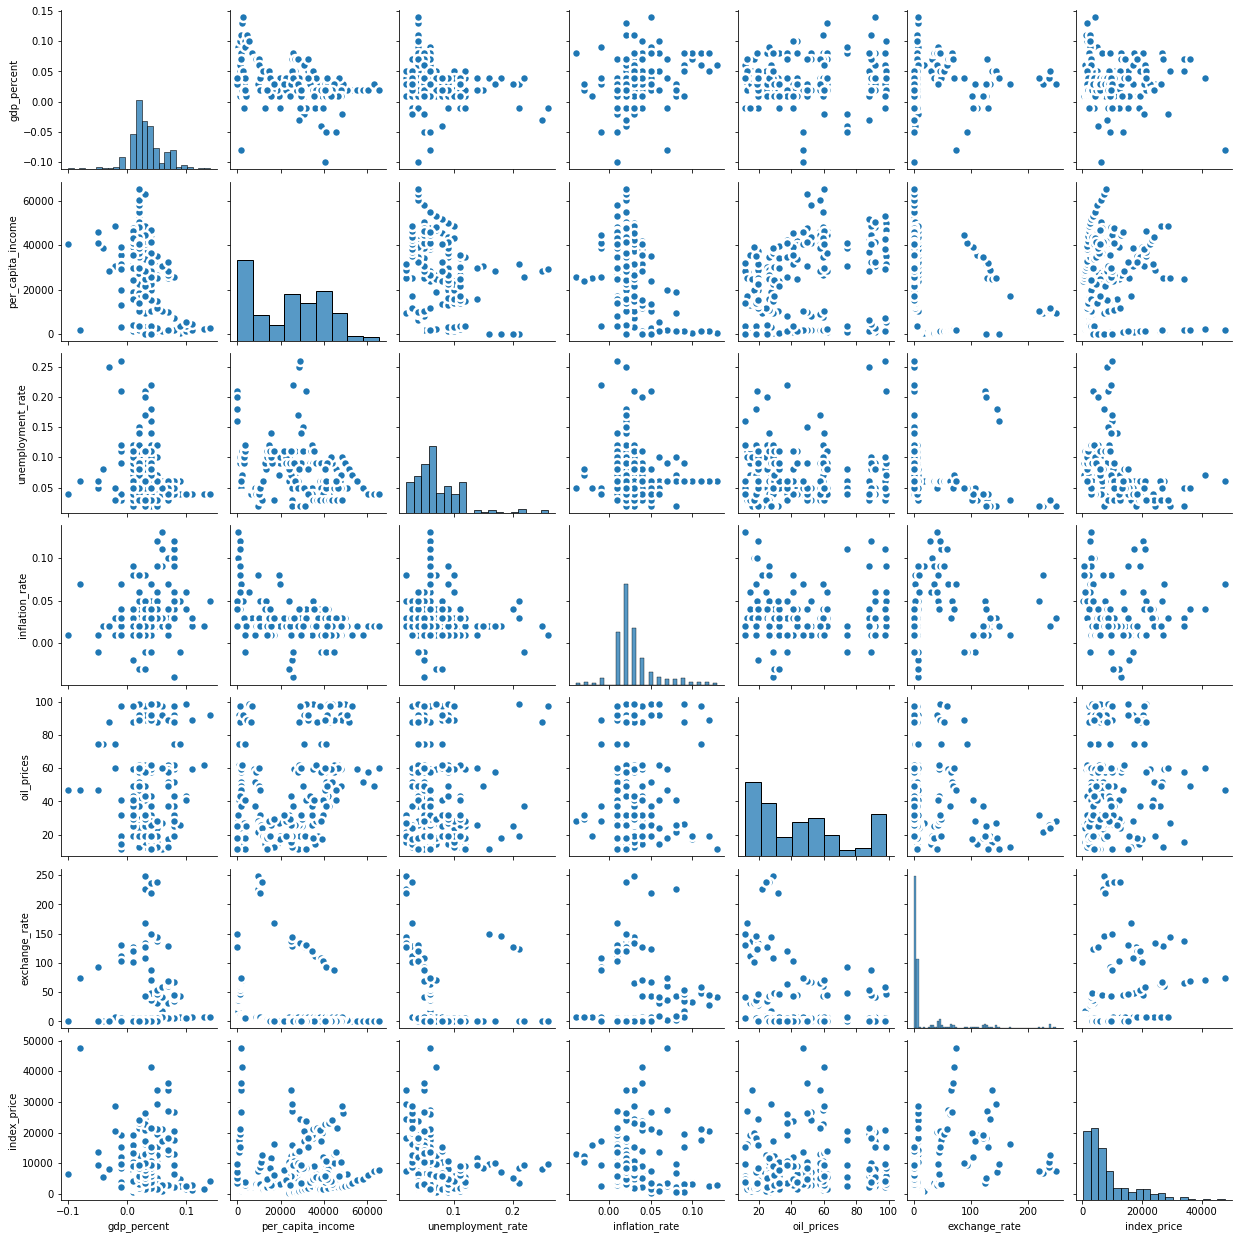

In [24]:
# Are there relationship among the selected features
g = sn.pairplot(data = df_clean, vars = ['gdp_percent', 'per_capita_income', 'unemployment_rate', 'inflation_rate', 
                                                  'oil_prices', 'exchange_rate','index_price'], palette='', plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

plt.show()



From the pairport, it's quite obvious that exchange rate has negative correlation with every other variable paired with. Same could be said with the inflation rate.